In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [2]:
#Reading data as data frame.
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#data shape
print(data.shape)
print("Data has 1338 rows and 7 columns.")

(1338, 7)
Data has 1338 rows and 7 columns.


In [4]:
#data types of each attributes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
#missing value finding
print(data.isnull().any())
#as all the columns is showing false then we can say that no missing value.

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [6]:
#5 point summary of numerical attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


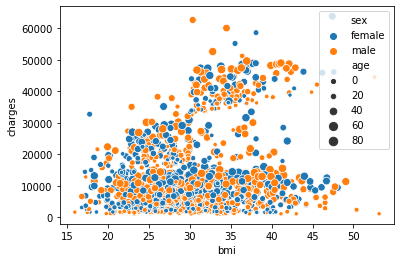

In [7]:
#A complete distribution plot of charges vs bmi and size of dot shows age and different color indicates sex.
sns.scatterplot(x='bmi', y = 'charges', size = 'age' , hue='sex' ,data = data)

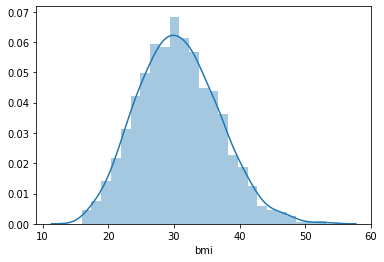

In [8]:
#distribution of bmi.
sns.distplot(data["bmi"],kde = True)

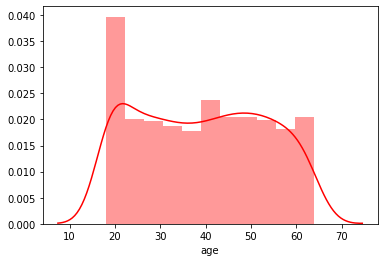

In [9]:
#distribution of age
sns.distplot(data["age"], color = 'r', kde = True)

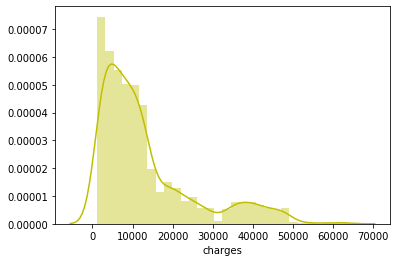

In [10]:
#distribution of charges
sns.distplot(data["charges"],color = 'y',kde = 'True' )

0.2840471105987448


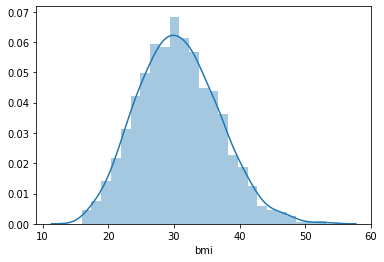

In [11]:
#skewness in bmi column
skew_bmi = data["bmi"].skew()
print(skew_bmi)
#positive skewness means :- The tail of distribution is longer on Right hand side.
#It is almost symmetrical because skewness value is close to 0.So it is bit of right skew data as tail longer on RHS.
sns.distplot(data["bmi"],kde = True)

0.05567251565299186


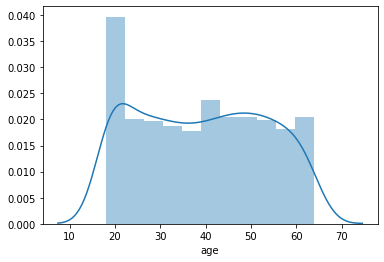

In [12]:
#skewness in age column
skew_age = data["age"].skew()
print(skew_age)
#it is almost symmetrical, but positive value indicates tail is bit longer on right hand side 
#value is close to 0 so we can say it is symmetrical, we can visualize it also
sns.distplot(data["age"],kde = True)

1.5158796580240388


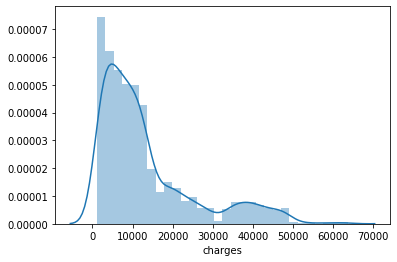

In [13]:
#skewness in charges column
skew_charges = data["charges"].skew()
print(skew_charges)
#here a strong positive value indicates that tail is longer towards right hand side.
#We can see it on the distribution also from distplot and it is highly skewed data.
sns.distplot(data["charges"], kde = 'True')

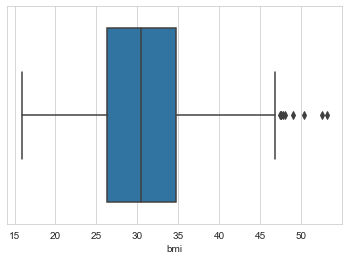

In [14]:
#Outliers can be detected visually with help of boxplot.
sns.set_style('whitegrid')
sns.boxplot(x = "bmi", data = data)
#So in this plot the dotted values are Outliers, and that can be calculated mathematically also
#if any value lies greater than  (Q3 + (1.5*IQR)) then it is conidered as higher outlier.

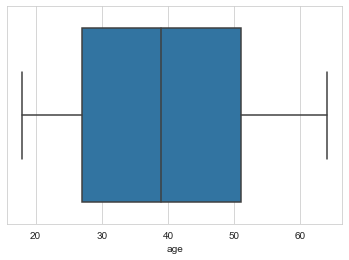

In [15]:
#Outliers for age
sns.set_style("whitegrid")
sns.boxplot(x = "age", data = data)
#hence i can conclude that there is no outliers in age.

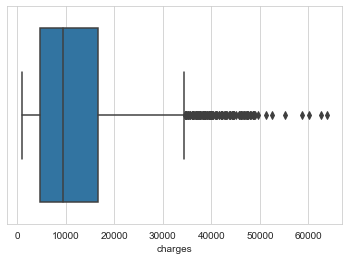

In [16]:
#Outliers for charges
sns.boxplot("charges",data=data)
#A lot of Outliers are present in this charges column , as it is shown in boxplot.

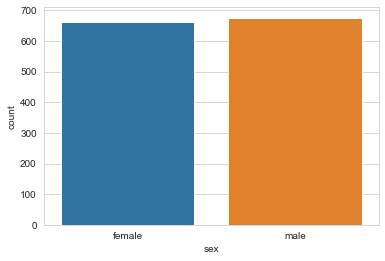

In [17]:
#Distribution of sex columns.
sns.countplot(data["sex"])


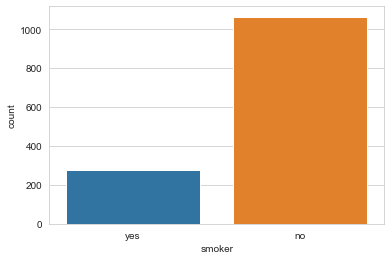

In [18]:
#Distribution of Smoker column
sns.countplot(data["smoker"])

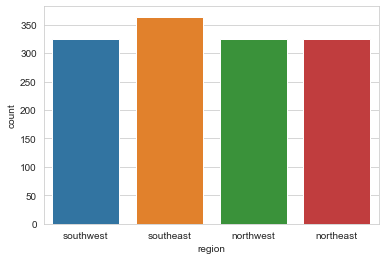

In [19]:
#Distribution of region
sns.countplot(data["region"])


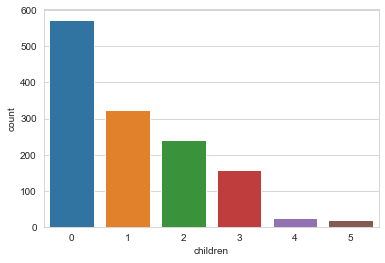

In [20]:
#Distribution of Children
sns.countplot(data["children"])


In [21]:
data1 = data
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data1 = pd.get_dummies(data1 , columns = ['sex'])
data1.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [23]:
data1= pd.get_dummies(data1, columns = ['smoker'])
data1.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


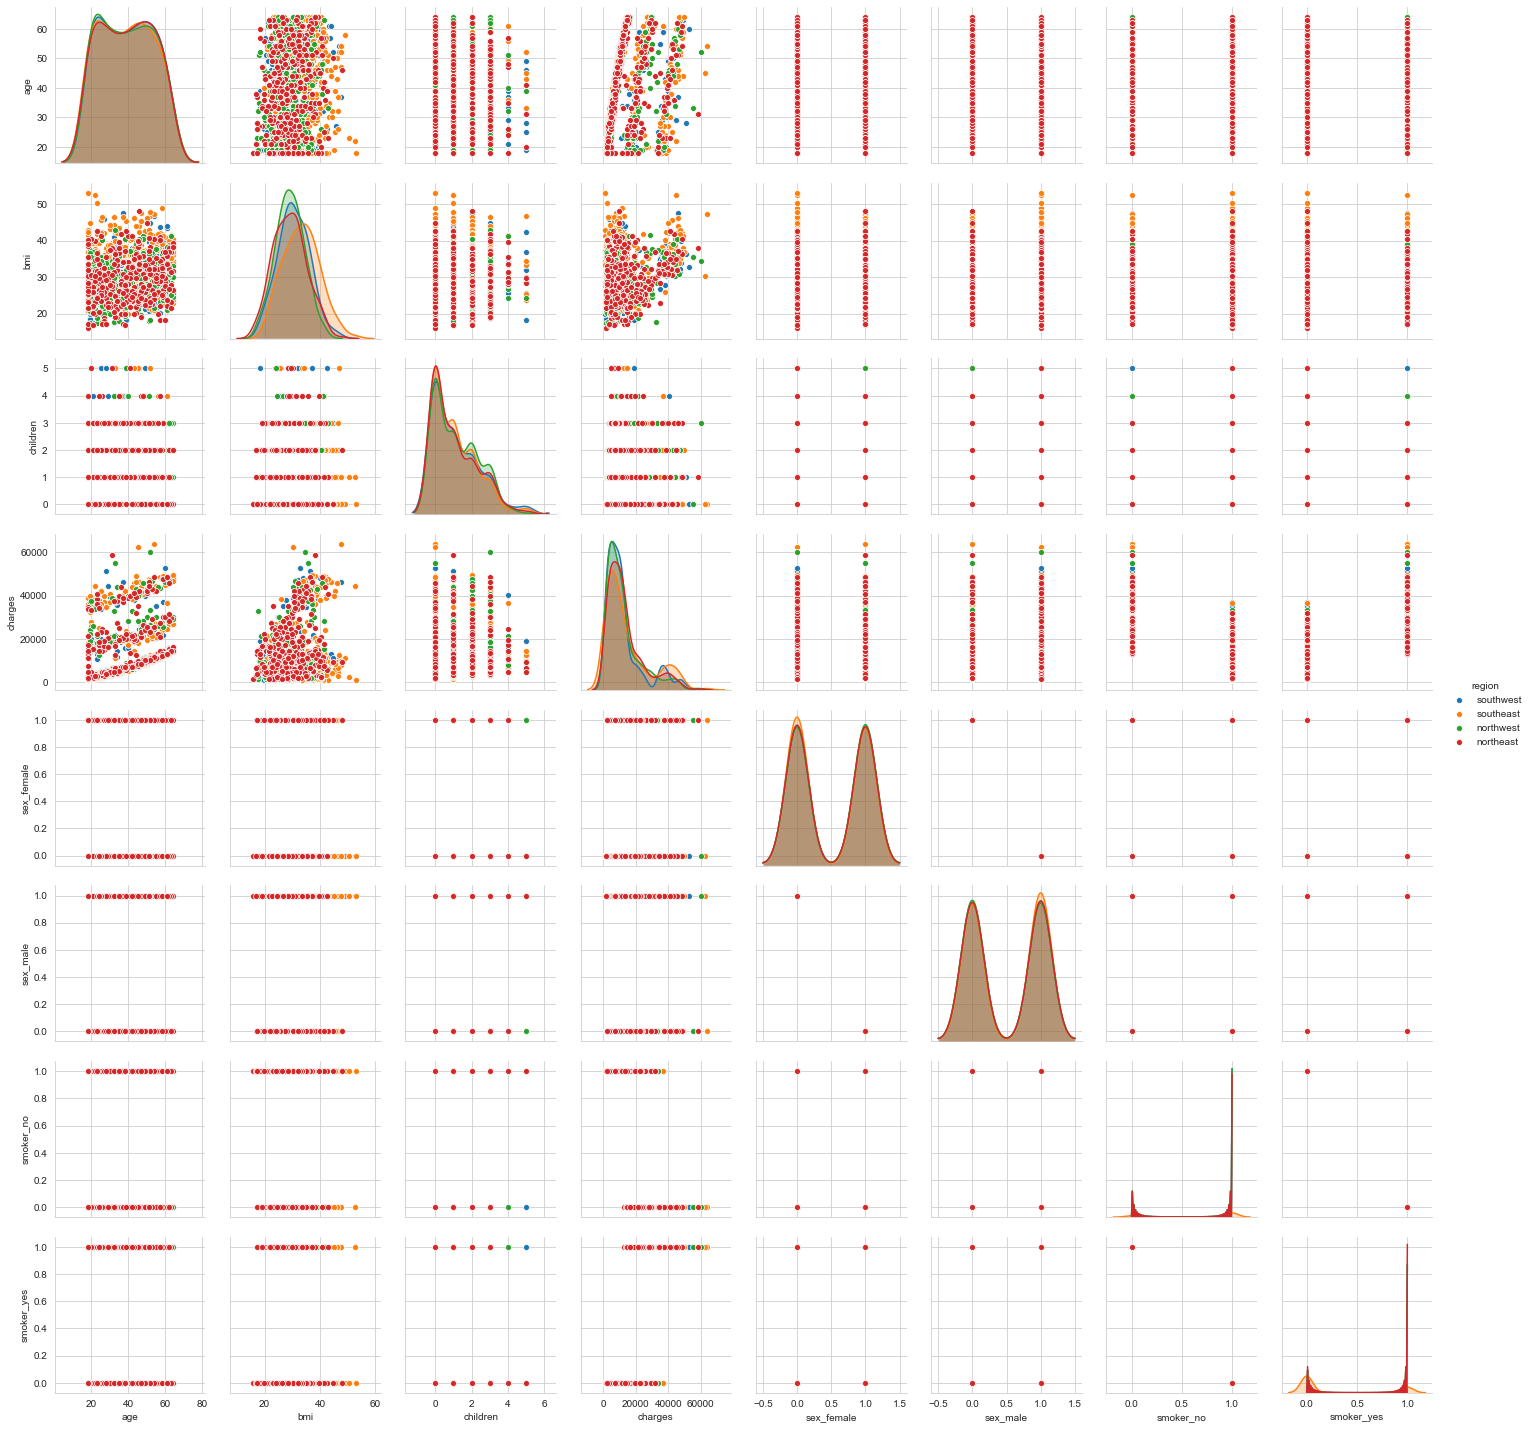

In [72]:
#pairplot to include all column
sns.pairplot(data = data1 , diag_kind= 'kde', hue = 'region', vars = ['age','bmi','children','charges','sex_female','sex_male',
                                                                     'smoker_no','smoker_yes'])


In [25]:
data.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [26]:
data.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [27]:
female_charges = data[data['sex']=='female']['charges']
male_charges = data[data['sex']=='male']['charges']

In [28]:
stats.ttest_ind(female_charges,male_charges)

Ttest_indResult(statistic=-2.097546590051688, pvalue=0.03613272100592976)

In [36]:
#to test the charges are significantly different for smoker and non smoker , we need perfor t test .
#if p value is less than alpha(0.05) then test significant
smoker_charges = data[data['smoker'] == 'yes']['charges']
non_smoker_charges = data[data['smoker'] == 'no']['charges']
stats.ttest_ind(smoker_charges , non_smoker_charges)
#As we can see p value is very small it is coming e^-283 which is close to 0 so we can say that test is significant
#I can conclude that Charges for smoker is significantly different from non smoker.

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [37]:
#As bmi is numerical and male and female is categorical variable , we apply t test.
male_bmi = data[data['sex']=='male']['bmi']
female_bmi =  data[data['sex'] == 'female']['bmi']
stats.ttest_ind(male_bmi, female_bmi)
#As we can see that p value is greater than alpha(0.05) , we can say that test is not significant.
#I can conclude that bmi of male does not significantly differ from female.

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

In [31]:
#Both the varibales are categorical so we will apply chi square for testing the significance.
#Creating Contingency table 
data_crosstab = pd.crosstab(data['sex'],data['smoker'])
data_crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [38]:
from scipy.stats import chi2_contingency
obs=np.array([[547,115],[517,159]])
statistics, p , dof ,expected= chi2_contingency(obs)
p
#As p value is close to 0 which is less than alpha(0.05), 
#So i can conclude that proportion of smokers significantly different in different genders.

0.006548143503580696

In [57]:
#Extracting female data from data frame.
female_data = data[data['sex']=='female']
female_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [66]:
#extracting female with 0 , 1 and 2 children from female_data data frame
female_data_children0 = female_data[female_data['children'] ==0]
female_data_children1 = female_data[female_data['children']==1]
female_data_children2 = female_data[female_data['children']==2]
    

In [68]:
female_data_children0_bmi=female_data_children0['bmi']
female_data_children1_bmi=female_data_children1['bmi']
female_data_children2_bmi =female_data_children2['bmi']

In [71]:
#As we have to compare 2 or more data , we will use Annova.
stats.f_oneway(female_data_children0_bmi,female_data_children1_bmi,female_data_children2_bmi)
#As p value is greater than alpha(0.05).
#Null hypothesis is true.
#Hence distribution of women with no children , 1 children and 2 children is same.

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)